# Regressão 01 - tarefa 02 - transformações em X e Y

In [7]:
#CARREGANDO PACOTES
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import statsmodels.formula.api as smf
%matplotlib inline
plt.rc('figure', figsize=(6, 4))

In [8]:
#carregando a base
tips = sns.load_dataset("tips")

#criando as colunas tip_pct e net_bill ()
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip']) #(percentual de gorjeta)
tips['net_bill'] = tips['total_bill'] - tips['tip'] #(total da conta - gorjeta)

#visualizando a nossa base de dados
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [10]:
#modelo de regressão tip_pct explicada por net_bill
reg = smf.ols('tip_pct ~ net_bill', data = tips).fit()

reg.summary() #resumo da regressão

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           1.52e-06
Time:                        22:46:57   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

No sumário acima podemos ver que temos um R-quadrado de aproximadamente 9,1%, isso significa que somente essa porcentagem de dados se ajusta à nossa regressão. 

(0.0, 0.505398619388979)

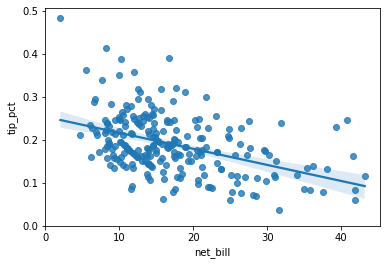

In [11]:
# Gráfico de dispersão tip_pct x net_bill
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips[tips['tip_pct']<.5])

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     67.94
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           1.11e-14
Time:                        22:50:20   Log-Likelihood:                 336.23
No. Observations:                 242   AIC:                            -668.5
Df Residuals:                     240   BIC:                            -661.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.38

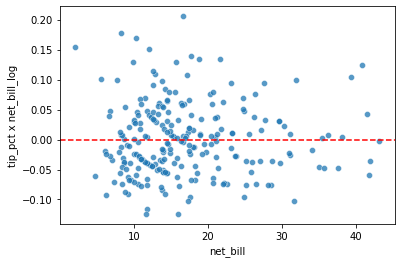

In [12]:
reg = smf.ols('tip_pct ~ np.log(net_bill+.1)', data = tips[tips['tip_pct']<.5]).fit() #colocamos o +0.1 para ele não calcular log de negativo
print(reg.summary())
tips['tip_pct x net_bill_log'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'tip_pct x net_bill_log', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

Utilizando o log de net_bill temos um gráfico um pouco menos padronizado, temos agora um ajuste à regressão de 22,1%, uma melhora considerável. 

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     30.98
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           1.09e-12
Time:                        22:52:50   Log-Likelihood:                 333.96
No. Observations:                 242   AIC:                            -661.9
Df Residuals:                     239   BIC:                            -651.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.29

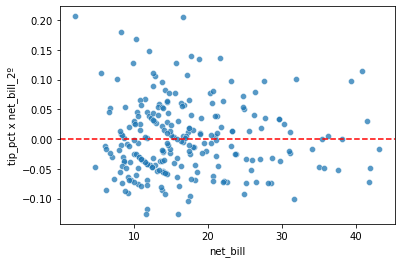

In [13]:
reg = smf.ols('tip_pct ~ net_bill + np.power(net_bill,2)', data = tips[tips['tip_pct']<.5]).fit() #np.power(x,2) = indica que quero net_bill na potência 2
print(reg.summary())
tips['tip_pct x net_bill_2º']=reg.resid #criando um tip_exp para saber como fica tip quando temos um polinômio de 2º em net_bill
sns.scatterplot(x = 'net_bill', y = 'tip_pct x net_bill_2º', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

O ajuste anterior nos deu um R-quadrado maior, portanto, o uso daquela é preferível ao uso desta. 

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                             OLS Regression Results                             
Dep. Variable:     np.log(tip_pct + .1)   R-squared:                       0.214
Model:                              OLS   Adj. R-squared:                  0.211
Method:                   Least Squares   F-statistic:                     65.35
Date:                  Sat, 29 Jul 2023   Prob (F-statistic):           3.09e-14
Time:                          22:54:25   Log-Likelihood:                 36.609
No. Observations:                   242   AIC:                            -69.22
Df Residuals:                       240   BIC:                            -62.24
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0323      0.032

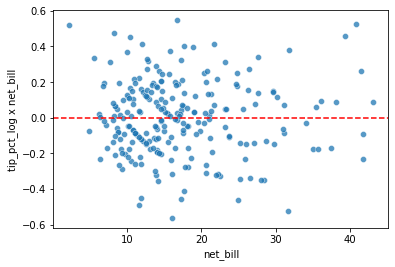

In [14]:
reg = smf.ols('np.log(tip_pct+.1) ~ net_bill', data = tips[tips['tip_pct']<.5]).fit() #colocamos o +0.1 para ele não calcular log de negativo
print(reg.summary())
tips['tip_pct_log x net_bill'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'tip_pct_log x net_bill', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

Novamente, a função utilizada no exerício de número 2 trouxe um ajuste melhor, apesar de não ser uma grande diferença de R-quadrado entre as duas. 

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

                             OLS Regression Results                             
Dep. Variable:     np.log(tip_pct + .1)   R-squared:                       0.228
Model:                              OLS   Adj. R-squared:                  0.225
Method:                   Least Squares   F-statistic:                     70.94
Date:                  Sat, 29 Jul 2023   Prob (F-statistic):           3.39e-15
Time:                          22:55:51   Log-Likelihood:                 38.806
No. Observations:                   242   AIC:                            -73.61
Df Residuals:                       240   BIC:                            -66.63
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept 

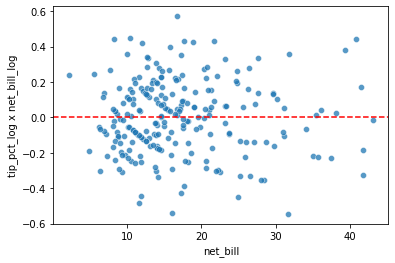

In [15]:
reg = smf.ols('np.log(tip_pct+.1) ~ np.log(net_bill+.1)', data = tips[tips['tip_pct']<.5]).fit() #colocamos o +0.1 para ele não calcular log de negativo
print(reg.summary())
tips['tip_pct_log x net_bill_log'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'tip_pct_log x net_bill_log', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

Utilizando a função log para as duas variáveis, obtemos um R-quadrado de 22,8%. 

###  6. qual modelo resultou no melhor ajuste?

O modelo do exercício de número 5, onde é calculado o log da variável x e também da variável y. Ele é o modelo com o maior R-quadrado, estando um pouco a frente do modelo do exercício 2. 